In [1]:
# Print the current working directory. sys.path.append works with relative paths, so this is useful to know.
import os
print(os.getcwd())

c:\Users\pablo\Documents\GitHub\2d-geometry-optimization-\files


In [2]:
import sys
sys.path.append('../src/')

In [3]:
import gymnasium as gym
import airfoil_env
import numpy as np

from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy

In [19]:
env = gym.make('AirfoilEnv-v0', n_params=10, max_steps=10, scale_actions = 0.15, airfoil_seed = [0.1*np.ones(10), -0.1*np.ones(10), 0.0],
                    delta_reward=False, cl_reward = True, cl_reset = 0.6, efficiency_param = 1, cl_wide = 20, render_mode="human")
model = PPO.load("../models/280424/280424_1optuna/logs/best_model.zip", env=env)
#model = PPO.load("16042024_NewRewardCl_4_DeltaReward", env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


c:\Users\pablo\Documents\GitHub\2d-geometry-optimization-\new_venv\Lib\site-packages\stable_baselines3\common\save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(
c:\Users\pablo\Documents\GitHub\2d-geometry-optimization-\new_venv\Lib\site-packages\stable_baselines3\common\save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(


In [20]:
# Evaluate the agent
# NOTE: If you use wrappers with your environment that modify rewards,
#       this will be reflected here. To evaluate with original rewards,
#       wrap environment in a "Monitor" wrapper before other wrappers.
mean_reward, std_reward = evaluate_policy(model, env=env, n_eval_episodes=15, deterministic=True)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

c:\Users\pablo\Documents\GitHub\2d-geometry-optimization-\new_venv\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


mean_reward:478.60 +/- 66.97


In [21]:
# Enjoy trained agent
vec_env = model.get_env()
obs = vec_env.reset()

Step: 0, Action: [[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.         -1.         -1.
   1.         -1.          0.21003544 -1.         -1.         -1.
  -1.         -1.          0.6014927 ]], Reward: [-100.], Done: [False], Info: [{'step': 1, 'efficiency': 0.0, 'cl': 0.0, 'TimeLimit.truncated': False}]


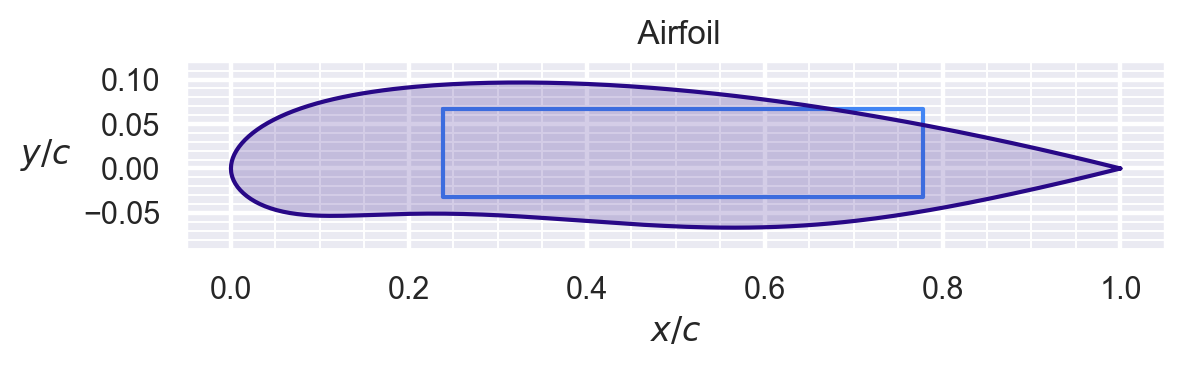

Step: 1, Action: [[ 1.          0.15136556  1.          1.          1.          1.
   1.          1.          1.          1.         -0.54100645 -0.5620328
   1.         -1.          0.9953281  -1.         -1.         -1.
  -1.         -1.          0.5705918 ]], Reward: [49.258034], Done: [False], Info: [{'step': 2, 'efficiency': 51.111332062611496, 'cl': 0.5570269149986113, 'TimeLimit.truncated': False}]


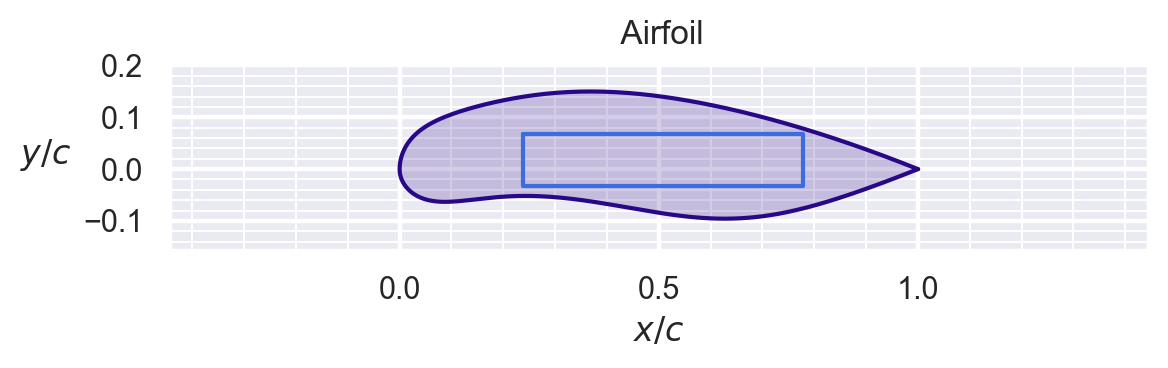

Step: 2, Action: [[ 0.95153725  0.14775544  1.          1.          1.          0.503176
   0.0150125   1.          1.          0.84049755  0.4698215   0.4390389
  -0.68131125 -0.6847838   1.         -0.17032687 -0.6865602  -0.47150975
  -0.11781287 -1.          0.7597497 ]], Reward: [48.80714], Done: [False], Info: [{'step': 3, 'efficiency': 51.972867872300604, 'cl': 0.6560558654957596, 'TimeLimit.truncated': False}]


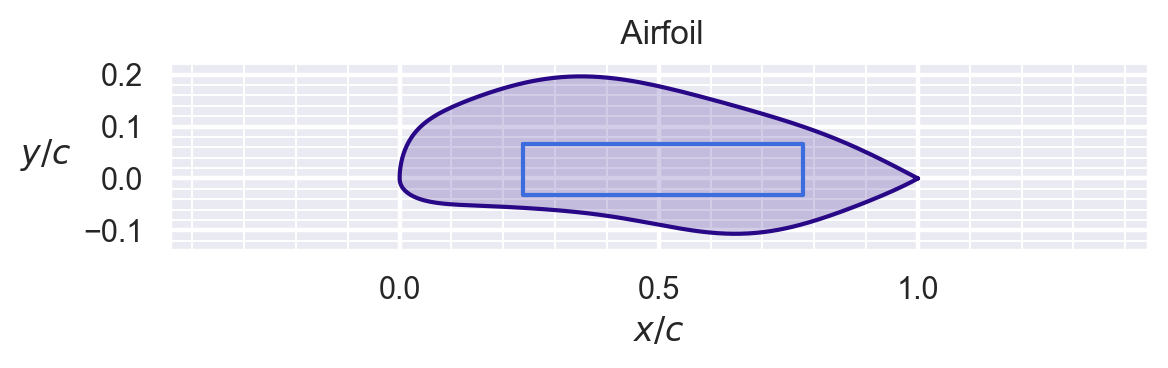

Step: 3, Action: [[-0.2780838  -0.16837497 -0.3466825  -0.40903276 -0.38980505 -0.44201982
  -0.64426124 -0.33873904  0.15189992  0.04849648  0.12970175  0.47007397
  -0.87473536  0.43058273  0.87243724  0.31915244  0.18715547  0.368667
   1.          0.09753454 -0.42139485]], Reward: [54.36165], Done: [False], Info: [{'step': 4, 'efficiency': 54.38640026521268, 'cl': 0.5952291410770925, 'TimeLimit.truncated': False}]


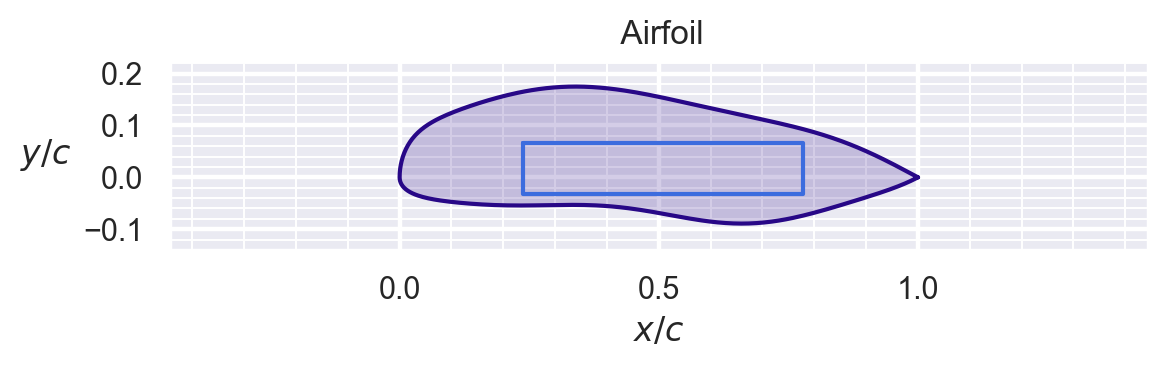

Step: 4, Action: [[-0.42311415  0.00408553 -0.11083269 -0.13037084 -0.03262927  0.7595921
   0.2828307  -0.1239404   0.6030693   0.09632144  0.02410352 -0.2121324
   0.18004614  0.07232203 -0.34104958 -0.10243975  0.12850755 -0.3684318
   0.01804194 -1.         -0.37423095]], Reward: [58.196026], Done: [False], Info: [{'step': 5, 'efficiency': 58.7031860030791, 'cl': 0.6208289850395315, 'TimeLimit.truncated': False}]


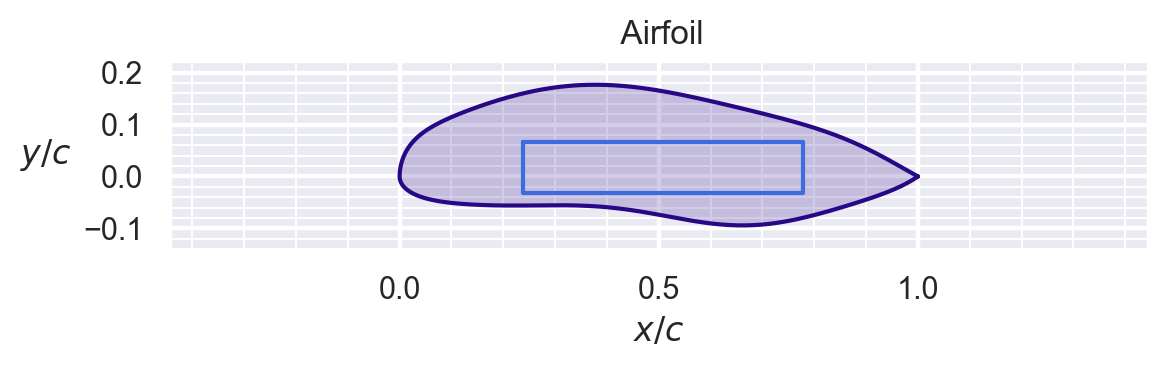

Step: 5, Action: [[ 0.2312001  -0.07071777  0.20790716 -0.05612561 -0.20803973 -0.1183205
  -0.7684765  -0.04138269  0.6495687   0.18953758  0.00261122  0.28862068
  -0.22680715  0.19511029 -0.07484201 -0.20723787  0.32037038 -0.13969134
   0.5098977  -0.8513563   0.00537879]], Reward: [56.855427], Done: [False], Info: [{'step': 6, 'efficiency': 56.86578661529489, 'cl': 0.6030182834762484, 'TimeLimit.truncated': False}]


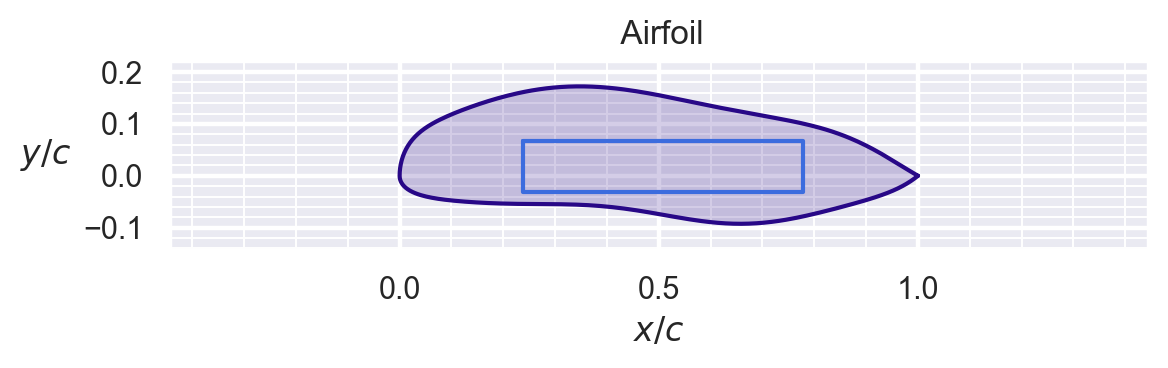

Step: 6, Action: [[-0.26977643 -0.1455888  -0.24628559 -0.20905142 -0.32639     0.6147768
  -0.15943494 -0.07385428  0.8047837   0.11809355 -0.02278058 -0.13205796
  -0.11892033  0.30219653 -0.08882654  0.03919879  0.25060147 -0.3842584
   0.32950702 -1.         -0.29072562]], Reward: [61.750233], Done: [False], Info: [{'step': 7, 'efficiency': 63.94462836355926, 'cl': 0.641785035284633, 'TimeLimit.truncated': False}]


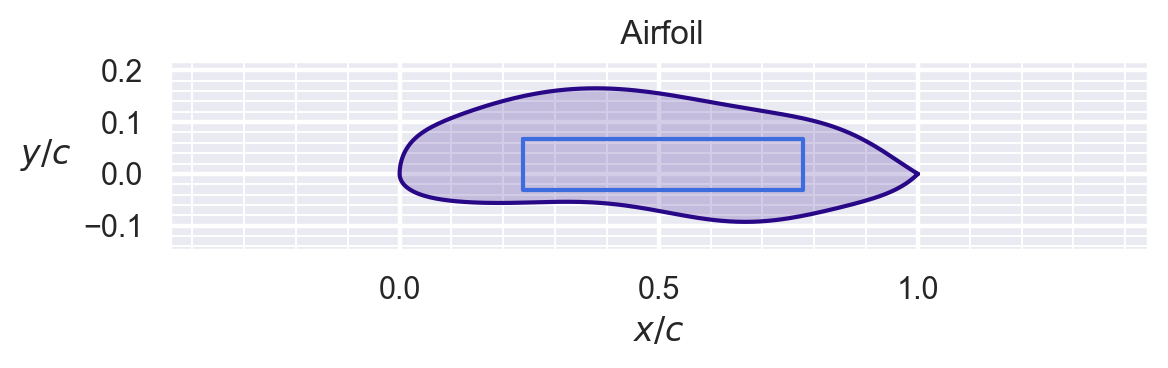

Step: 7, Action: [[ 0.02488499 -0.05199385  0.08265562 -0.04552381 -0.37394184  0.35564208
  -0.675156    0.00655115  0.9870987   0.2072945  -0.00100528  0.08955913
  -0.12618247  0.26370963 -0.39272875 -0.08005451  0.51920867 -0.36787844
   0.22381333 -1.          0.01562778]], Reward: [62.19259], Done: [False], Info: [{'step': 8, 'efficiency': 62.45930363411964, 'cl': 0.6146276655133596, 'TimeLimit.truncated': False}]


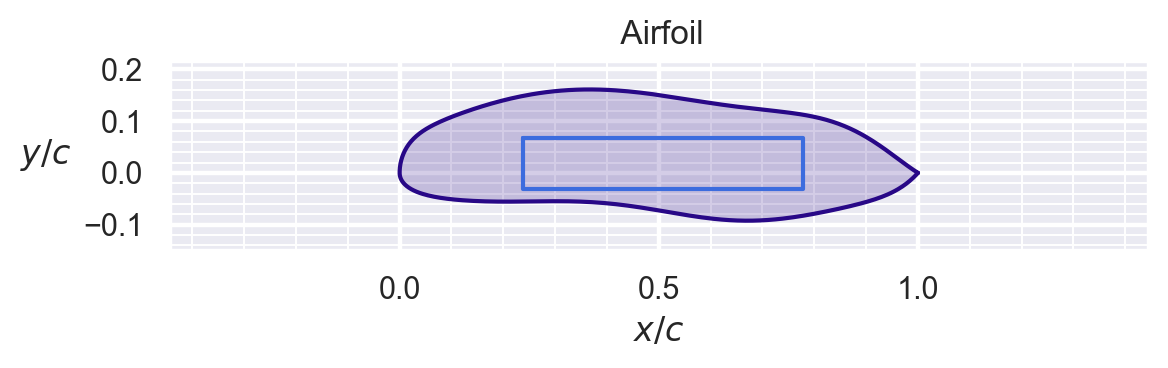

Step: 8, Action: [[-0.1594148  -0.14542313 -0.11802962 -0.09184329 -0.47580922  0.6705813
  -0.51402426  0.01825145  1.          0.18530434 -0.04875372 -0.06416909
  -0.1613146   0.38330808 -0.326617    0.02216508  0.4825917  -0.5227954
   0.20070171 -1.         -0.12012096]], Reward: [65.467064], Done: [False], Info: [{'step': 9, 'efficiency': 67.92620051436822, 'cl': 0.64293869556317, 'TimeLimit.truncated': False}]


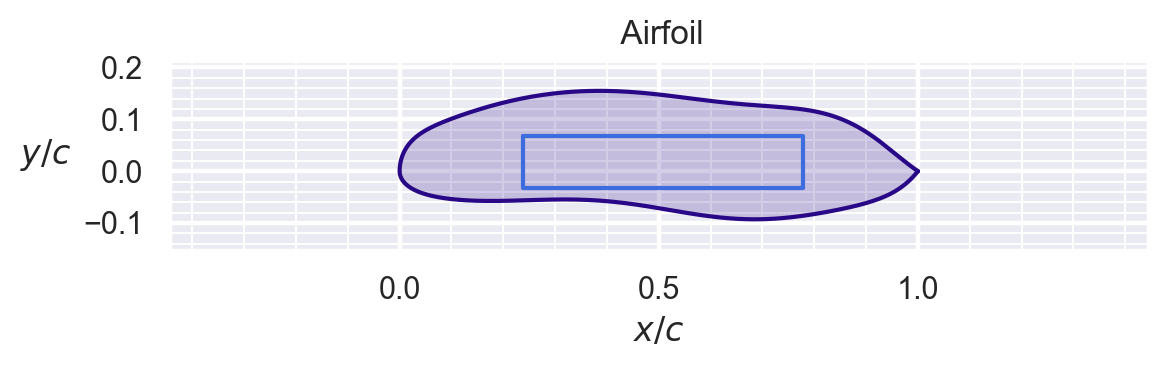

Step: 9, Action: [[-0.09048512 -0.1063769  -0.03331468 -0.00199217 -0.542766    0.67396504
  -0.6927533   0.06628406  1.          0.23438495 -0.03276794  0.01889855
  -0.15595382  0.39523193 -0.5243842   0.0178359   0.6755893  -0.5286716
   0.09745806 -1.         -0.00541114]], Reward: [67.102425], Done: [ True], Info: [{'step': 10, 'efficiency': 68.34088742205198, 'cl': 0.630239138716614, 'episode': {'r': 423.990583, 'l': 10, 't': 9.942673}, 'TimeLimit.truncated': False, 'terminal_observation': {'airfoil': array([ 0.39801222,  0.19220968,  0.46531266,  0.40840903,  0.19759284,
        0.852609  , -0.07343947,  0.47697556,  1.3294631 ,  0.6879896 ,
       -0.2530114 , -0.19963017, -0.12477683, -0.19634838,  0.0994029 ,
       -0.42425603, -0.11838035, -0.7621855 , -0.06075896, -1.4130733 ,
        0.1111436 ], dtype=float32), 'cl_target': array([0.6], dtype=float32), 'boxes': array([0.5080448 , 0.01759704, 0.5389692 , 0.09863916], dtype=float32)}}]


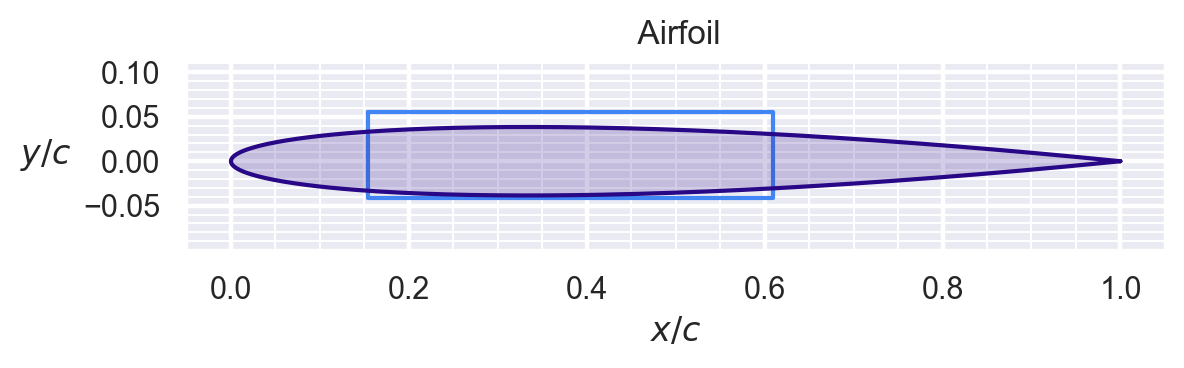

Step: 10, Action: [[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.         -1.         -1.
   1.         -1.          0.23177046 -1.         -1.         -1.
  -1.         -1.          0.6456504 ]], Reward: [1.7904072], Done: [False], Info: [{'step': 1, 'efficiency': 26.57559753590169, 'cl': 0.23274325624316106, 'TimeLimit.truncated': False}]


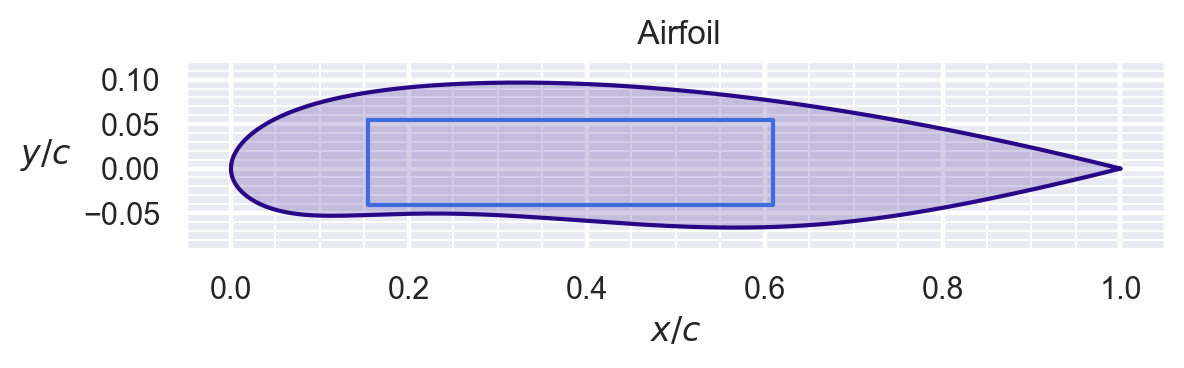

Step: 11, Action: [[ 1.          0.11688508  1.          1.          1.          1.
   1.          1.          1.          1.         -0.7081858  -0.7532028
   0.7424884  -1.          1.         -1.         -1.         -1.
  -1.         -1.          0.6209583 ]], Reward: [45.05084], Done: [False], Info: [{'step': 2, 'efficiency': 49.3169683659547, 'cl': 0.5327405867573368, 'TimeLimit.truncated': False}]


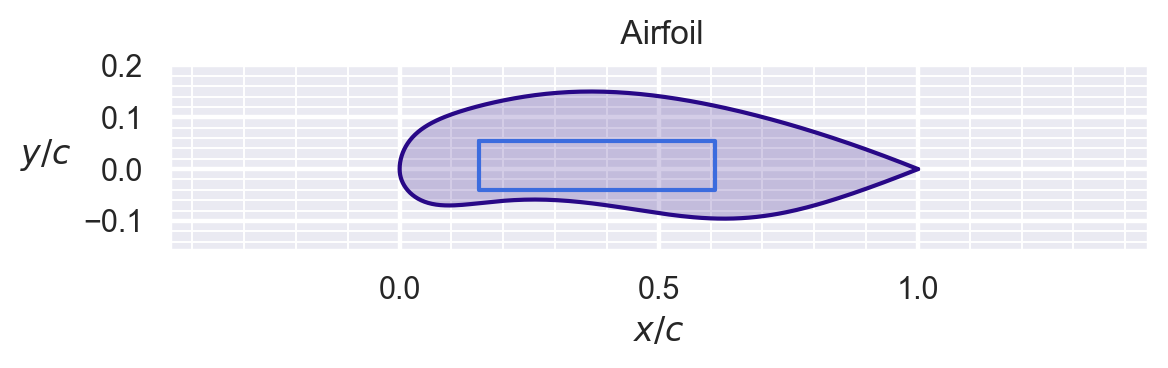

Step: 12, Action: [[ 0.90486395  0.13868108  1.          1.          1.          0.10224714
  -0.48647007  0.7995249   0.9604149   0.57186055  0.4881673   0.50534254
  -0.7416111  -0.5551156   1.         -0.21587661 -0.854052   -0.5418941
   0.25487876 -0.803181    0.83484244]], Reward: [49.61725], Done: [False], Info: [{'step': 3, 'efficiency': 54.19636196703058, 'cl': 0.6664361495539509, 'TimeLimit.truncated': False}]


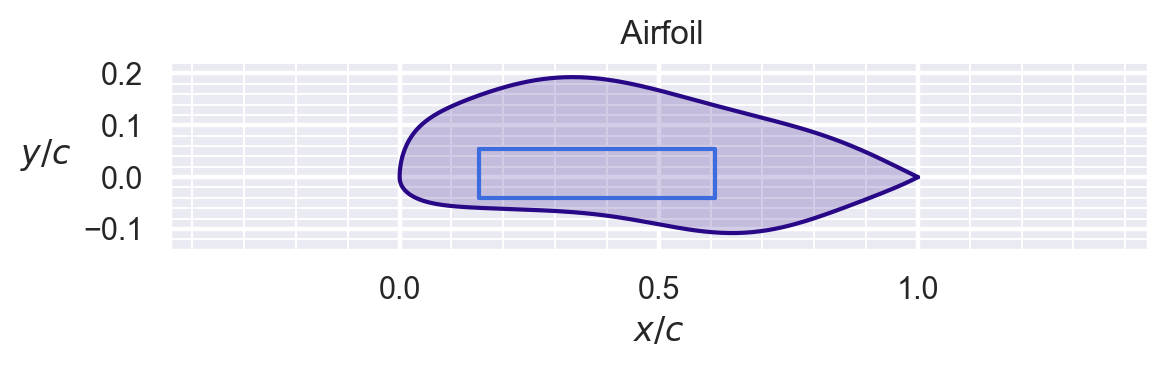

Step: 13, Action: [[-0.5480218  -0.23092388 -0.71469104 -0.6950619  -0.48188376 -0.14596894
  -0.30498227 -0.62801164 -0.18518832 -0.1465511   0.08056386  0.30949017
  -0.8559323   0.44623414  0.72919446  0.5383384   0.07510276  0.28596455
   1.          0.28044277 -0.60312104]], Reward: [54.274376], Done: [False], Info: [{'step': 4, 'efficiency': 54.601563324339, 'cl': 0.5826646063910509, 'TimeLimit.truncated': False}]


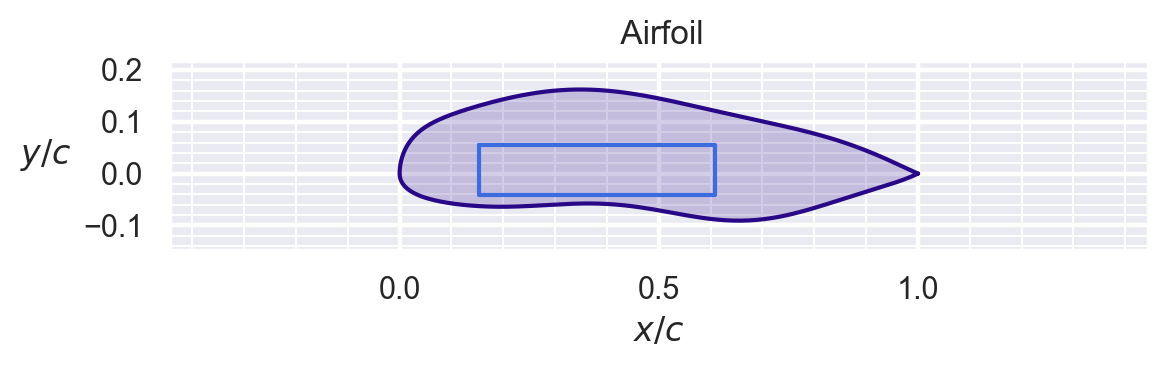

Step: 14, Action: [[-0.23114479  0.03598354  0.20914279 -0.04634719  0.0525872   0.69357467
   0.18387449 -0.03306096  0.46626252  0.09048536 -0.00764833 -0.08896659
   0.23797104 -0.04901554 -0.5441029  -0.10338491  0.14300533 -0.3661507
  -0.14113079 -1.         -0.25584778]], Reward: [58.35633], Done: [False], Info: [{'step': 5, 'efficiency': 59.08438659628792, 'cl': 0.6248986537832344, 'TimeLimit.truncated': False}]


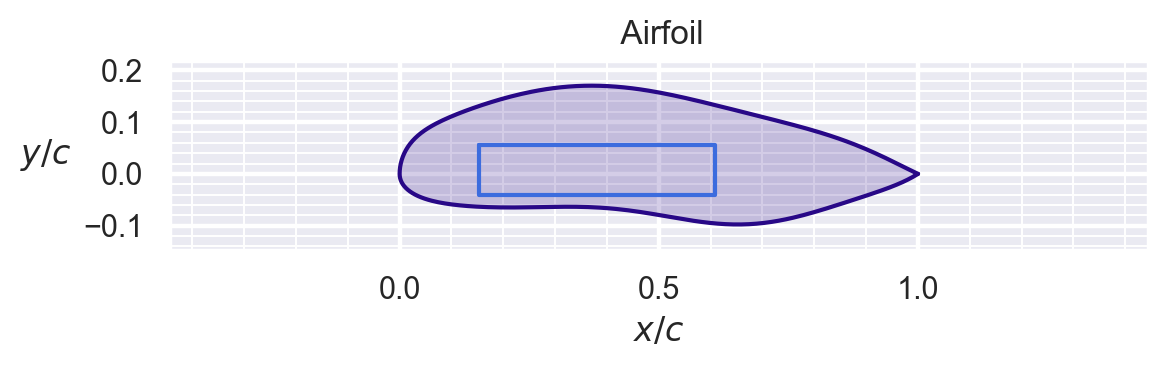

Step: 15, Action: [[ 0.21303296 -0.16129254  0.17457047 -0.12163982 -0.21594805 -0.07231858
  -0.7035575  -0.04408121  0.41306546  0.132402    0.00340661  0.29632664
  -0.2575072   0.23087746  0.01345787 -0.06205225  0.2300442  -0.09974937
   0.57634795 -0.62674725 -0.07937228]], Reward: [57.707527], Done: [False], Info: [{'step': 6, 'efficiency': 57.76599816430136, 'cl': 0.607115931926602, 'TimeLimit.truncated': False}]


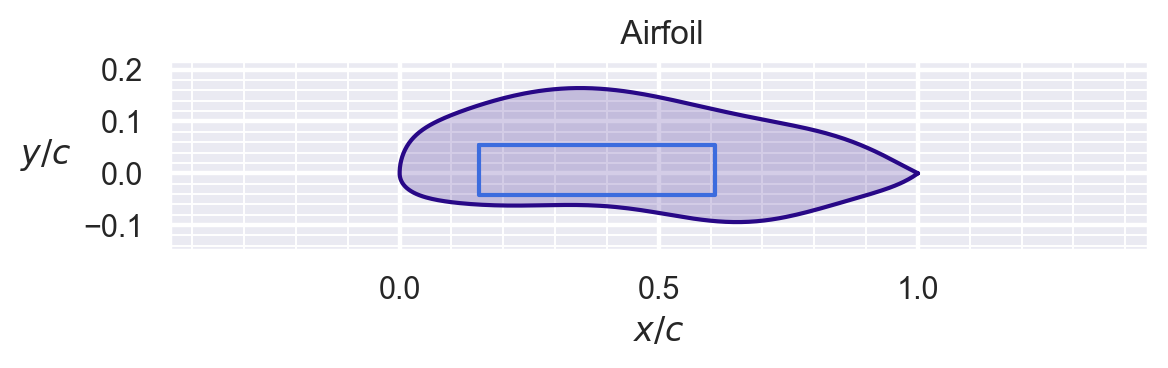

Step: 16, Action: [[-0.24963927 -0.12666844 -0.16778705 -0.22039415 -0.2891832   0.6233154
  -0.10818675 -0.06154742  0.59585595  0.08098625 -0.01598628 -0.14103079
  -0.06926269  0.23325363 -0.18393075  0.10028414  0.17678393 -0.3802688
   0.25640047 -0.9133523  -0.2884682 ]], Reward: [61.584957], Done: [False], Info: [{'step': 7, 'efficiency': 64.11056154815833, 'cl': 0.6448282757289806, 'TimeLimit.truncated': False}]


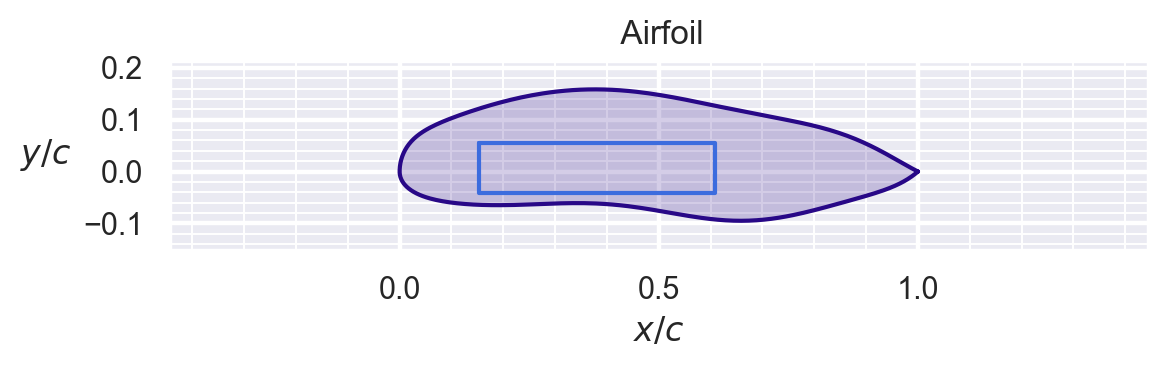

Step: 17, Action: [[ 0.0767274  -0.07384157  0.13556255 -0.04294588 -0.32656407  0.31984517
  -0.664598    0.04237848  0.7695316   0.19212566  0.0040118   0.12755299
  -0.10281171  0.23731774 -0.39132553  0.00149769  0.4471985  -0.30857742
   0.21437228 -1.          0.00255219]], Reward: [61.709816], Done: [False], Info: [{'step': 8, 'efficiency': 62.07875794314949, 'cl': 0.6172639112308667, 'TimeLimit.truncated': False}]


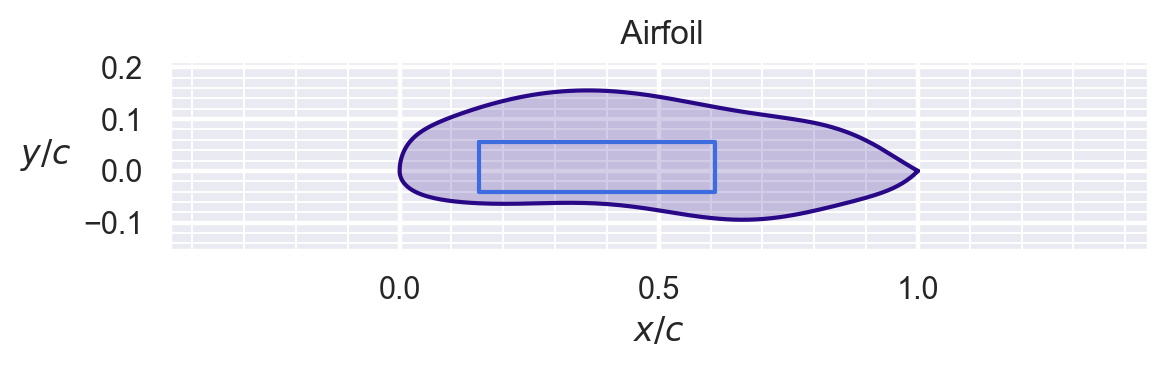

Step: 18, Action: [[-0.1574969  -0.14988486 -0.1052959  -0.11617205 -0.44204563  0.65480644
  -0.4633902   0.0422185   0.9278556   0.15834987 -0.05121353 -0.07131723
  -0.15461737  0.34906015 -0.3230401   0.10142131  0.36839628 -0.48563468
   0.19587094 -1.         -0.1504632 ]], Reward: [64.29355], Done: [False], Info: [{'step': 9, 'efficiency': 66.7094746379168, 'cl': 0.642946333399177, 'TimeLimit.truncated': False}]


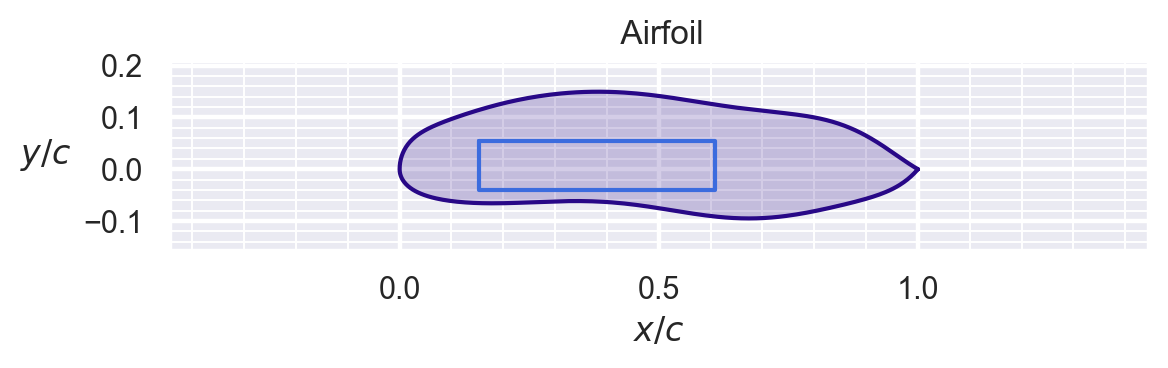

Step: 19, Action: [[-0.06389549 -0.11118053 -0.00962579 -0.01765308 -0.51581526  0.6317648
  -0.69316626  0.08083167  1.          0.22077373 -0.02489621  0.036565
  -0.15819293  0.36876824 -0.5367177   0.08670583  0.5804076  -0.48690045
   0.09765208 -1.         -0.01396465]], Reward: [65.37979], Done: [ True], Info: [{'step': 10, 'efficiency': 66.23545020275785, 'cl': 0.6254976081352706, 'episode': {'r': 519.764841, 'l': 10, 't': 11.958114}, 'TimeLimit.truncated': False, 'terminal_observation': {'airfoil': array([ 0.3916639 ,  0.16566369,  0.4782814 ,  0.3609679 ,  0.21717209,
        0.8210899 , -0.08607149,  0.42973787,  1.1421697 ,  0.5950649 ,
       -0.2847671 , -0.21688601, -0.1539214 , -0.21079296,  0.04929587,
       -0.33295998, -0.224967  , -0.75748163, -0.03184125, -1.3094257 ,
        0.10691494], dtype=float32), 'cl_target': array([0.6], dtype=float32), 'boxes': array([0.38141236, 0.00691008, 0.4556361 , 0.09583128], dtype=float32)}}]


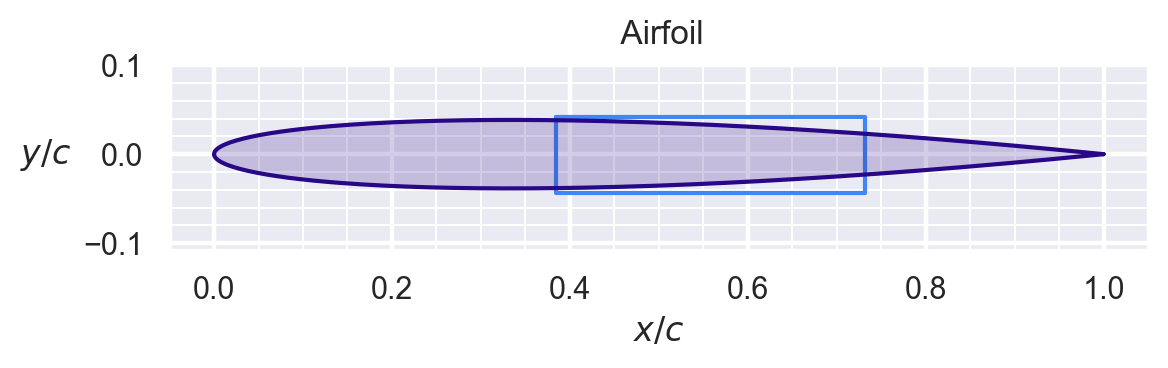

In [22]:

for i in range(20):
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, dones, info = vec_env.step(action)
    print(f"Step: {i}, Action: {action}, Reward: {rewards}, Done: {dones}, Info: {info}")
    vec_env.render()